In [1]:
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans

def load_image(filename) :
    img = Image.open(filename)
    data = np.array( img, dtype='uint8' )
    return data

img = load_image('data/img2.jpg')

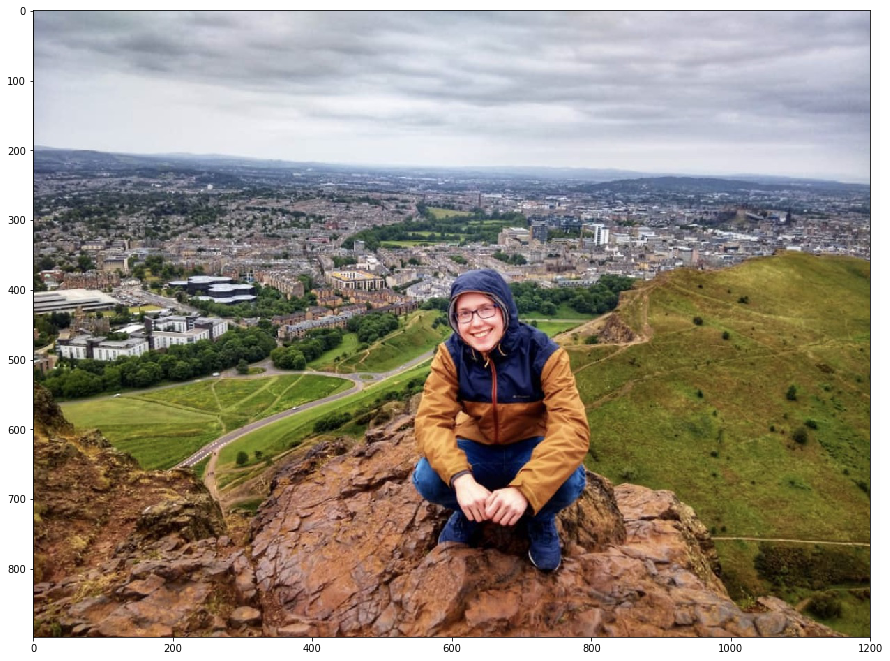

In [14]:
from matplotlib.pyplot import imshow, subplots
fig, ax = subplots(figsize=(15, 17))
ax.imshow(img, interpolation="nearest")  

In [3]:
pixel_array = img.reshape(img.shape[0]*img.shape[1],3)
pixel_array

array([[ 58,  62,  71],
       [159, 163, 174],
       [157, 163, 175],
       ...,
       [ 69,  67,  18],
       [ 67,  65,  16],
       [ 66,  64,  15]], dtype=uint8)

In [18]:

n=20

kmeans = KMeans(n_clusters=n).fit(pixel_array)

In [19]:
labels_img = kmeans.labels_.reshape(img.shape[0],img.shape[1])

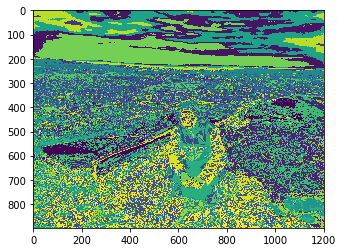

In [20]:
imshow(labels_img, interpolation="nearest")  

In [21]:
def get_avg_color(pixels, labels, label):
    r_sum = 0
    g_sum = 0
    b_sum = 0
    count = 0
    for ((r,g,b), l) in zip(pixels,labels):
        if l == label:
            r_sum += r
            g_sum += g
            b_sum += b
            count += 1

    return r_sum//count, g_sum//count, b_sum//count

get_avg_color(pixel_array, kmeans.labels_, 0)

(144, 140, 67)

In [22]:
def get_compressed(pixel_array, labels,n):
    avg_colors = []
    for i in range(0,n):
        avg_colors.append(get_avg_color(pixel_array, kmeans.labels_,i))
    return avg_colors

compressed_colors = get_compressed(pixel_array, kmeans.labels_, n)

In [23]:
def compress_pixel_array(labels, compressed_colors):
    new_pixel_array = []
    for l in labels:
        new_pixel_array.append(compressed_colors[l])
    return new_pixel_array

compressed_array = np.array(compress_pixel_array(kmeans.labels_, compressed_colors))

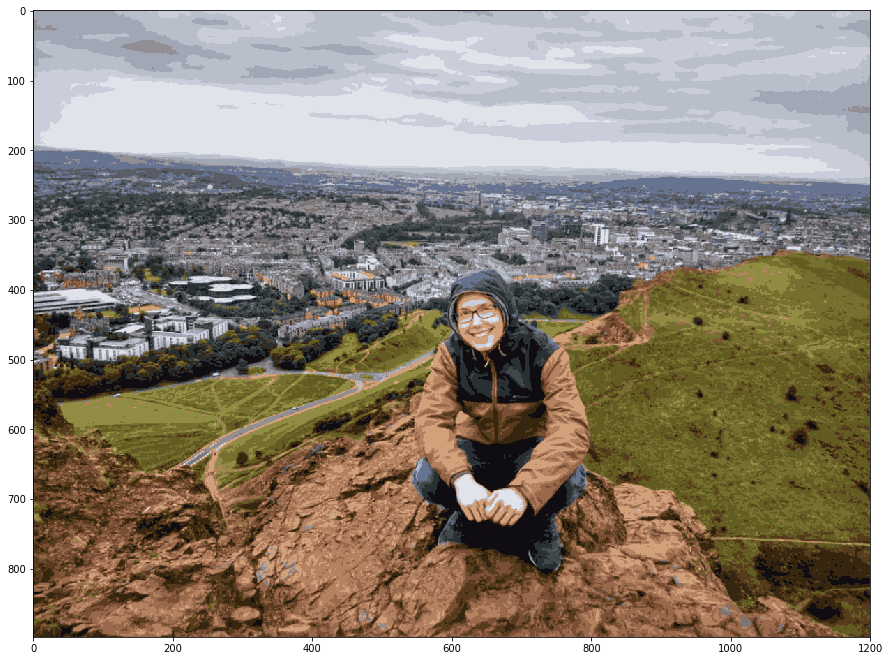

In [24]:
compressed_img = compressed_array.reshape(img.shape[0],img.shape[1],3)
fig, ax = subplots(figsize=(15, 17))
ax.imshow(compressed_img, interpolation="nearest")  

In [11]:
# def compress_image(color_count, img):
#     pixel_array = img.reshape(img.shape[0]*img.shape[1],3)
#     kmeans = KMeans(n_clusters=color_count).fit(pixel_array)
#     labels_img = kmeans.labels_.reshape(img.shape[0],img.shape[1])
#     compressed_colors = get_compressed(pixel_array, kmeans.labels_, color_count)
#     compressed_array = np.array(compress_pixel_array(kmeans.labels_, compressed_colors))
#     compressed_img = compressed_array.reshape(img.shape[0],img.shape[1],3)
#     return compressed_img

In [12]:
# img5 = compress_image(5, img)

In [25]:
# imshow(img5, interpolation="nearest")